In [ ]:
import itertools
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score,confusion_matrix
from sklearn.naive_bayes import GaussianNB


# Load the uploaded dataset to explore its contents
file_path = "https://drive.google.com/uc?export=download&id=1Ew4EXokyoA0ZrIEGQQbP2tmm2A_d20ai"
df = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
df.head()

,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      346 non-null    int64 
 1   loan_status     346 non-null    object
 2   Principal       346 non-null    int64 
 3   terms           346 non-null    int64 
 4   effective_date  346 non-null    object
 5   due_date        346 non-null    object
 6   age             346 non-null    int64 
 7   education       346 non-null    object
 8   Gender          346 non-null    object
dtypes: int64(4), object(5)
memory usage: 24.5+ KB


In [ ]:
type_change_df=df.copy()
# Assuming 'data' is the DataFrame loaded from your dataset
type_change_df['effective_date'] = pd.to_datetime(df['effective_date'])
type_change_df['due_date'] = pd.to_datetime(df['due_date'])

### Check for missing values, and findout there is no any missing values

In [ ]:
type_change_df.isnull().sum()

,0
Unnamed: 0,0
loan_status,0
Principal,0
terms,0
effective_date,0
due_date,0
age,0
education,0
Gender,0


## Exploratory Data Analysis (EDA)

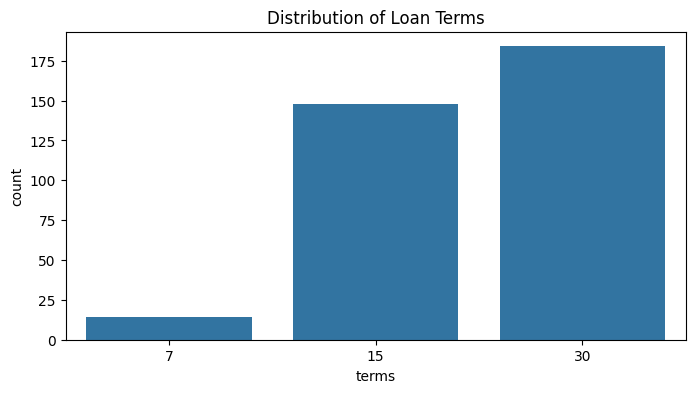

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(x='terms', data=type_change_df)
plt.title('Distribution of Loan Terms')
plt.show()

### Relationship Between terms and loan_status

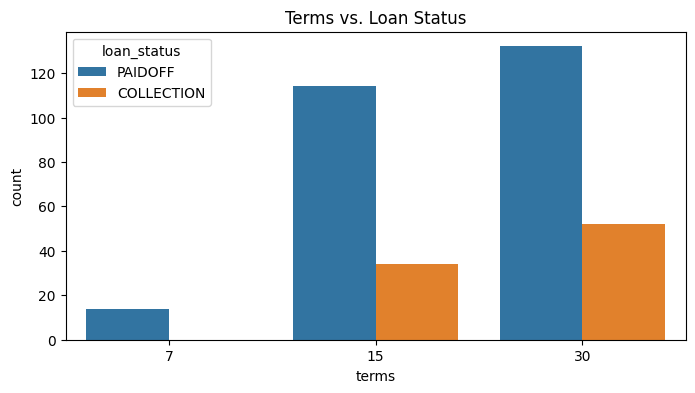

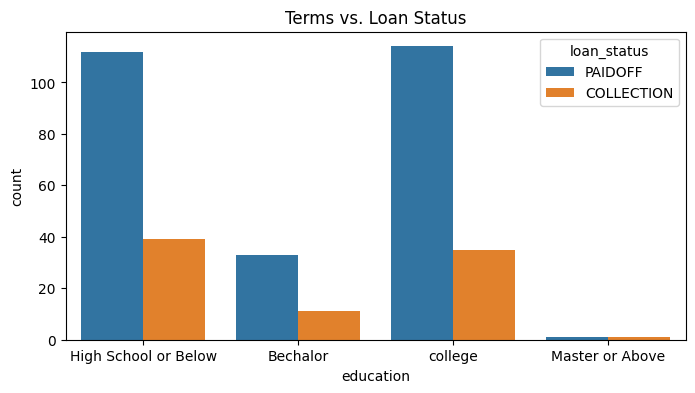

In [ ]:
# Count plot of loan status segmented by terms
plt.figure(figsize=(8, 4))
sns.countplot(x='terms', hue='loan_status', data=df)
plt.title('Terms vs. Loan Status')
plt.show()


plt.figure(figsize=(8, 4))
sns.countplot(x='education', hue='loan_status', data=df)
plt.title('Terms vs. Loan Status')
plt.show()
# scatter plot or multi bar plot () or bar chart

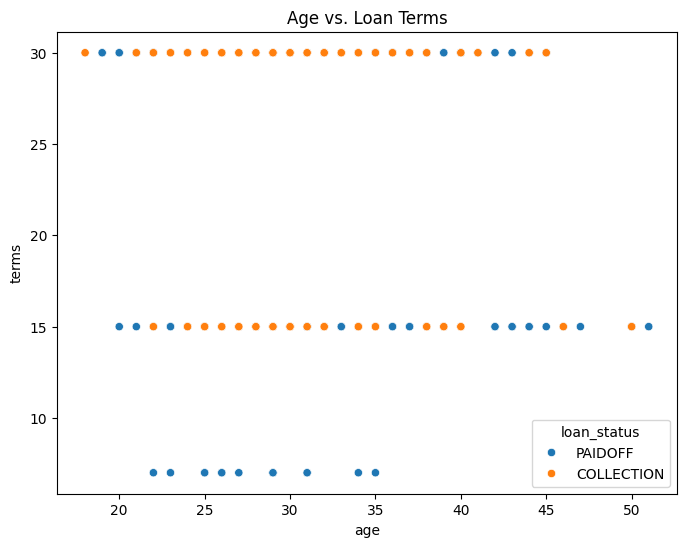

In [ ]:
# Scatter plot of age vs. terms to see if age affects loan term preference
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='terms', data=type_change_df, hue='loan_status')
plt.title('Age vs. Loan Terms')
plt.show()


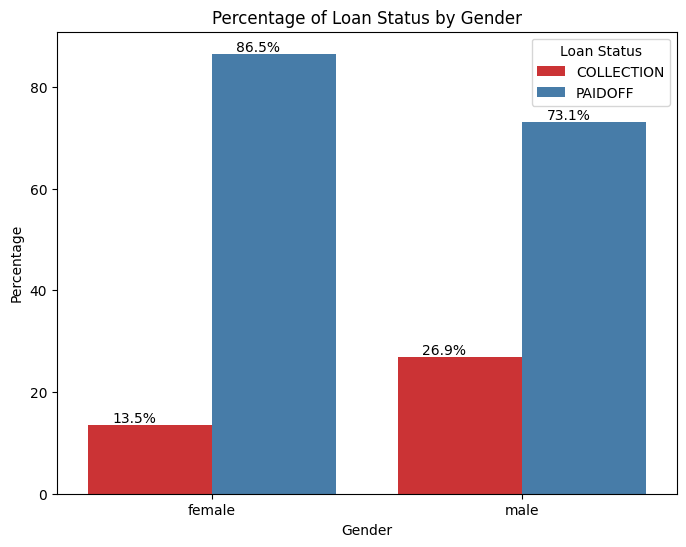

In [ ]:
# Create a percentage-based data frame for gender vs. loan status
gender_status = df.groupby(['Gender', 'loan_status']).size().reset_index(name='Count')
gender_status['Percentage'] = gender_status.groupby('Gender')['Count'].transform(lambda x: x / x.sum() * 100)

# Plotting percentage bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Gender', y='Percentage', hue='loan_status', data=gender_status, palette='Set1')
plt.title('Percentage of Loan Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.legend(title='Loan Status')

# Display percentage values on the bars
for p in ax.patches:
    percentage = p.get_height()  # Get the height of each bar, which is the percentage
    if percentage > 0.5:  # Display only if percentage is greater than 0.5 to avoid 0.0%
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_height() + 0.5
        ax.text(x, y, f'{percentage:.1f}%', ha='center', fontsize=10, color='black')

plt.show()

<ipython-input-78-17d4a6ae7aed>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_status = df.groupby(['age_group', 'loan_status']).size().reset_index(name='Count')
<ipython-input-78-17d4a6ae7aed>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_status['Percentage'] = age_status.groupby('age_group')['Count'].transform(lambda x: x / x.sum() * 100)


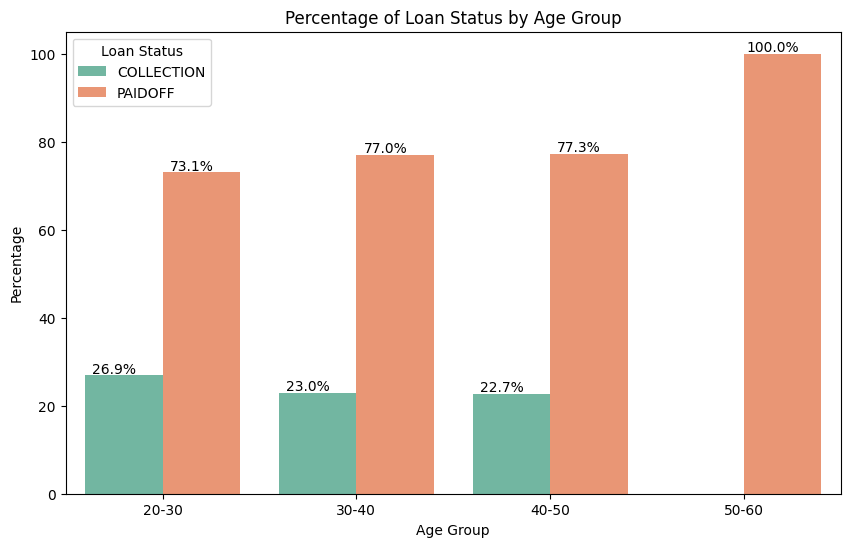

In [ ]:
# Create age bins
df['age_group'] = pd.cut(df['age'], bins=[20, 30, 40, 50, 60], labels=['20-30', '30-40', '40-50', '50-60'])

# Create percentage-based data frame for age_group vs. loan_status
age_status = df.groupby(['age_group', 'loan_status']).size().reset_index(name='Count')
age_status['Percentage'] = age_status.groupby('age_group')['Count'].transform(lambda x: x / x.sum() * 100)

# Plotting percentage bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='age_group', y='Percentage', hue='loan_status', data=age_status, palette='Set2')
plt.title('Percentage of Loan Status by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.legend(title='Loan Status')

# Display percentage values on the bars
for p in ax.patches:
    percentage = p.get_height()
    if percentage > 0.5:  # Only show values greater than 0.5%
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_height() + 0.5
        ax.text(x, y, f'{percentage:.1f}%', ha='center', fontsize=10, color='black')

plt.show()

<ipython-input-79-2a6fd51537cd>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  principal_status = df.groupby(['principal_group', 'loan_status']).size().reset_index(name='Count')
<ipython-input-79-2a6fd51537cd>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  principal_status['Percentage'] = principal_status.groupby('principal_group')['Count'].transform(lambda x: x / x.sum() * 100)


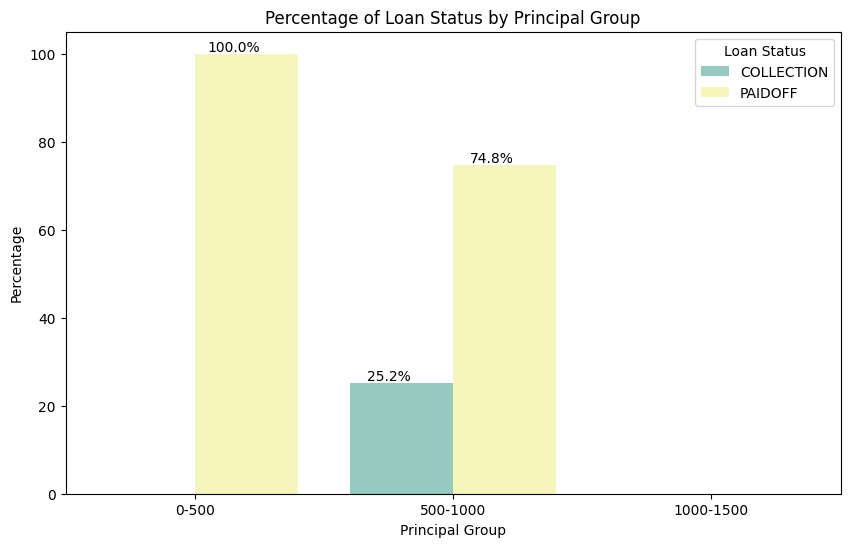

In [ ]:
# Create percentage-based data frame for principal_group vs. loan_status
df['principal_group'] = pd.cut(df['Principal'], bins=[0, 500, 1000, 1500], labels=['0-500', '500-1000', '1000-1500'])
principal_status = df.groupby(['principal_group', 'loan_status']).size().reset_index(name='Count')
principal_status['Percentage'] = principal_status.groupby('principal_group')['Count'].transform(lambda x: x / x.sum() * 100)

# Plotting percentage bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='principal_group', y='Percentage', hue='loan_status', data=principal_status, palette='Set3')
plt.title('Percentage of Loan Status by Principal Group')
plt.xlabel('Principal Group')
plt.ylabel('Percentage')
plt.legend(title='Loan Status')

# Display percentage values on the bars
for p in ax.patches:
    percentage = p.get_height()
    if percentage > 0.5:  # Only show values greater than 0.5%
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_height() + 0.5
        ax.text(x, y, f'{percentage:.1f}%', ha='center', fontsize=10, color='black')

plt.show()

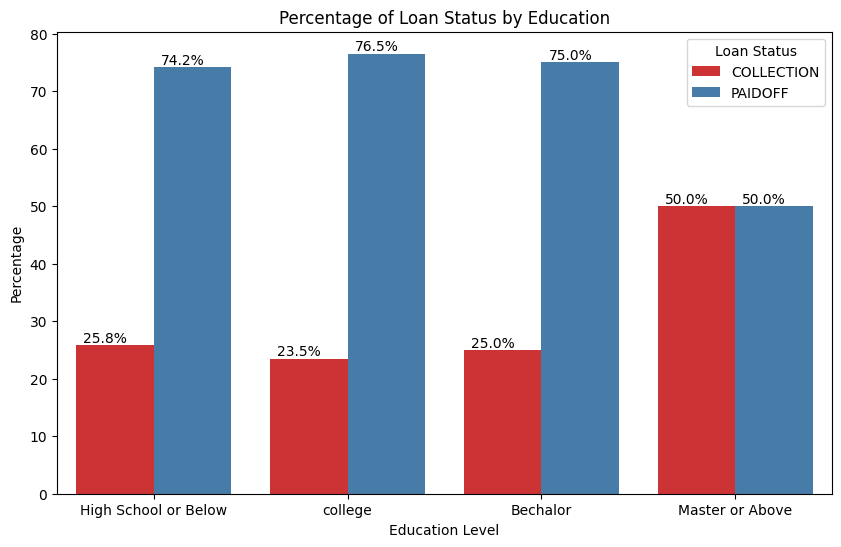

In [ ]:
# Define the desired order of education levels
education_order = ['High School or Below', 'college', 'Bechalor', 'Master or Above']

# Create percentage-based data frame for education vs. loan_status
education_status = df.groupby(['education', 'loan_status']).size().reset_index(name='Count')
education_status['Percentage'] = education_status.groupby('education')['Count'].transform(lambda x: x / x.sum() * 100)

# Plotting percentage bar plot with sorted education levels
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='education', y='Percentage', hue='loan_status', data=education_status, palette='Set1', order=education_order)
plt.title('Percentage of Loan Status by Education')
plt.xlabel('Education Level')
plt.ylabel('Percentage')
plt.legend(title='Loan Status')

# Display percentage values on the bars
for p in ax.patches:
    percentage = p.get_height()
    if percentage > 0.5:  # Only show values greater than 0.5%
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_height() + 0.5
        ax.text(x, y, f'{percentage:.1f}%', ha='center', fontsize=10, color='black')

plt.show()

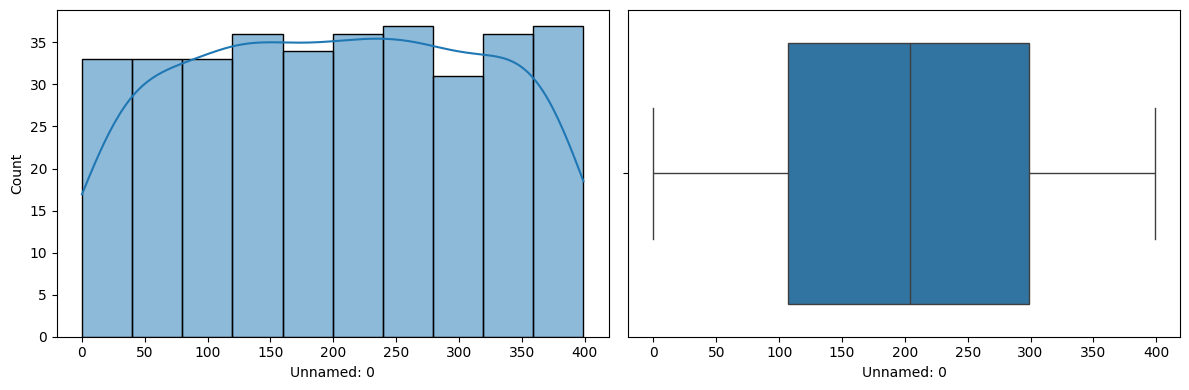

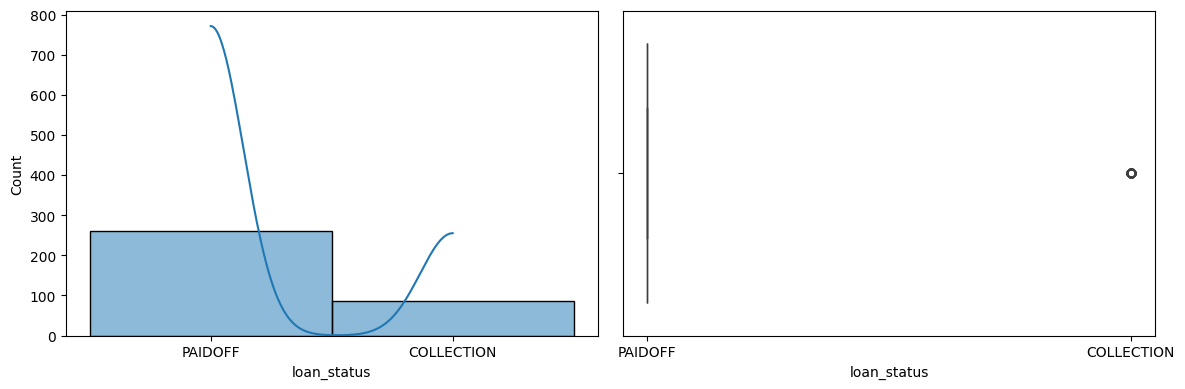

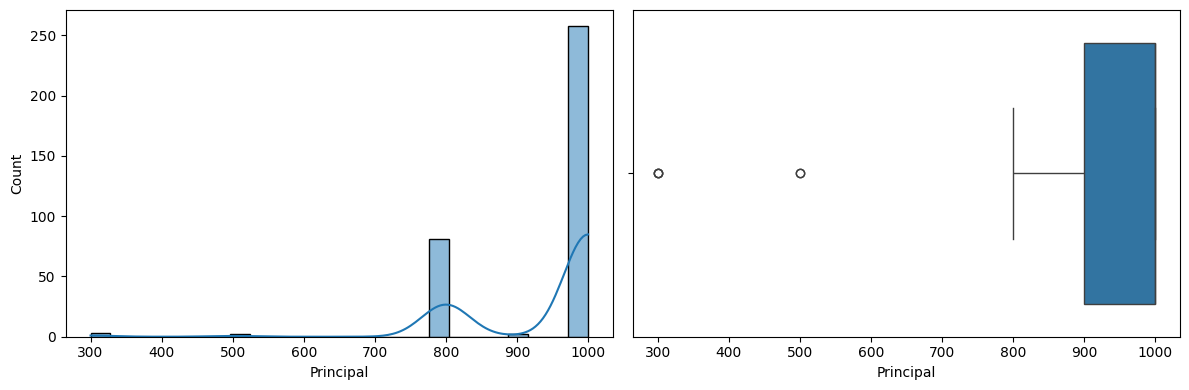

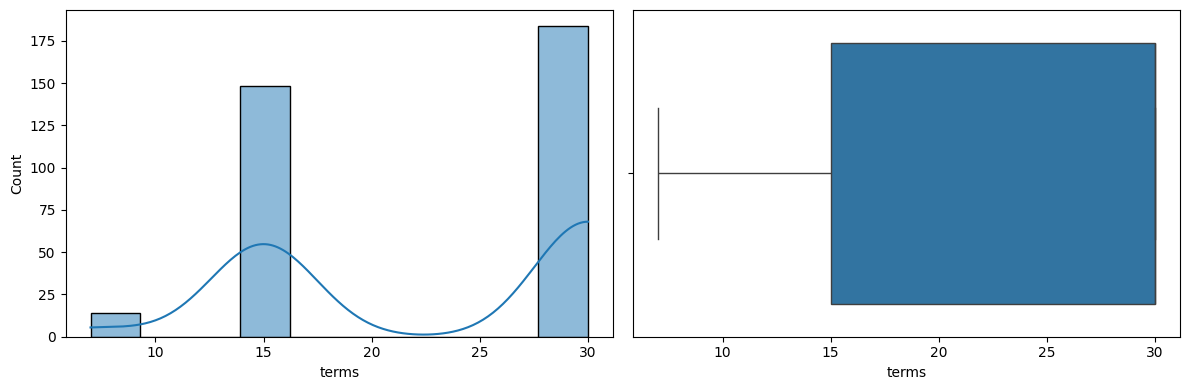

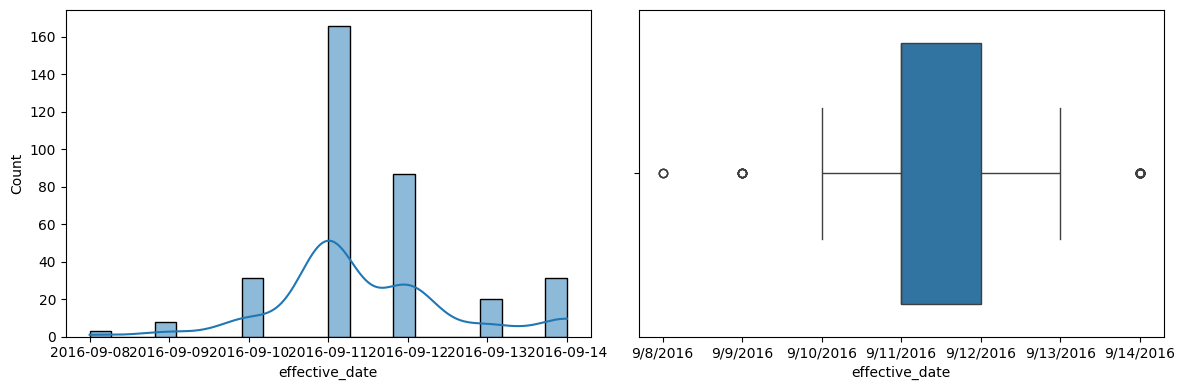

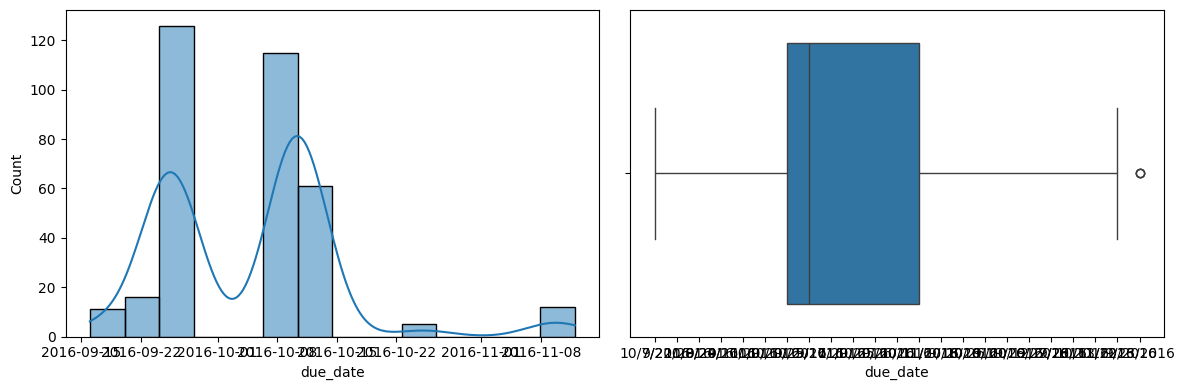

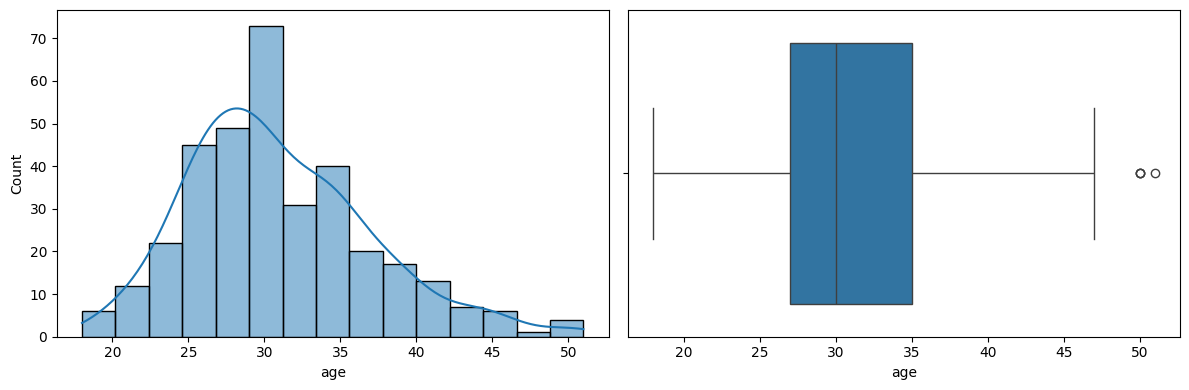

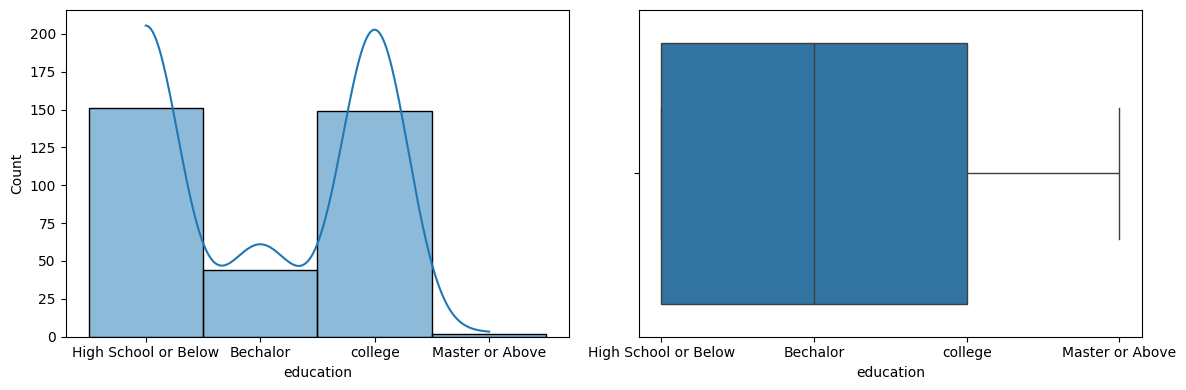

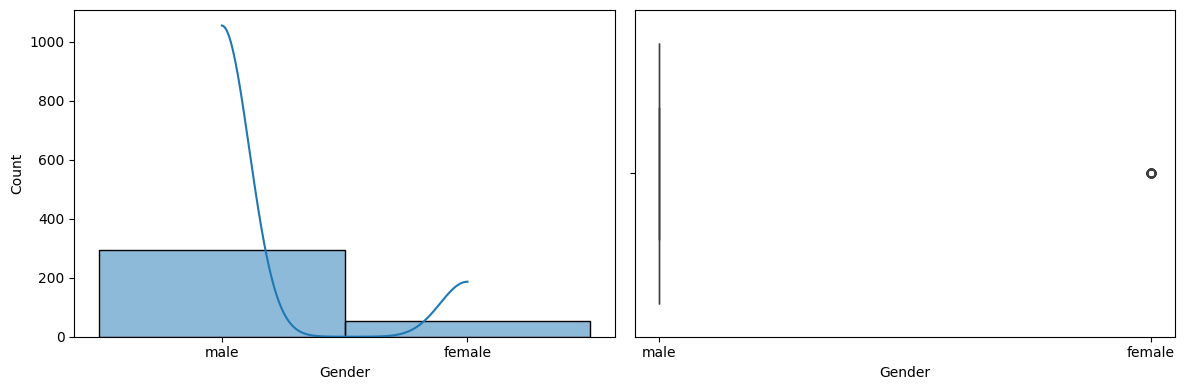

In [ ]:

for col in type_change_df.columns:
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(type_change_df[col], kde=True)
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.tight_layout()
    plt.show()

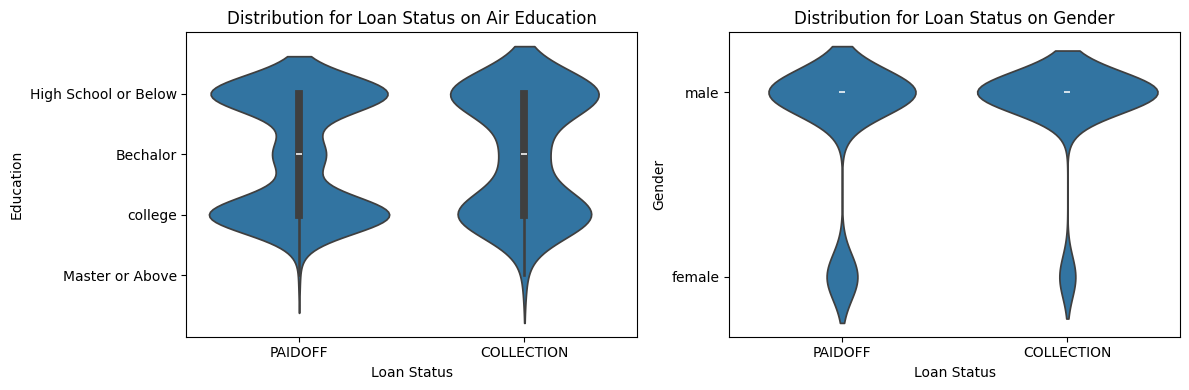

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.violinplot(x="loan_status", y ="education",data =type_change_df,)
plt.title("Distribution for Loan Status on Air Education")
plt.xlabel("Loan Status")
plt.ylabel("Education")

plt.subplot(1, 2, 2)
sns.violinplot(x="loan_status", y ="Gender",data =type_change_df)
plt.title("Distribution for Loan Status on Gender")
plt.xlabel("Loan Status")
plt.ylabel("Gender")
plt.tight_layout()
plt.show()

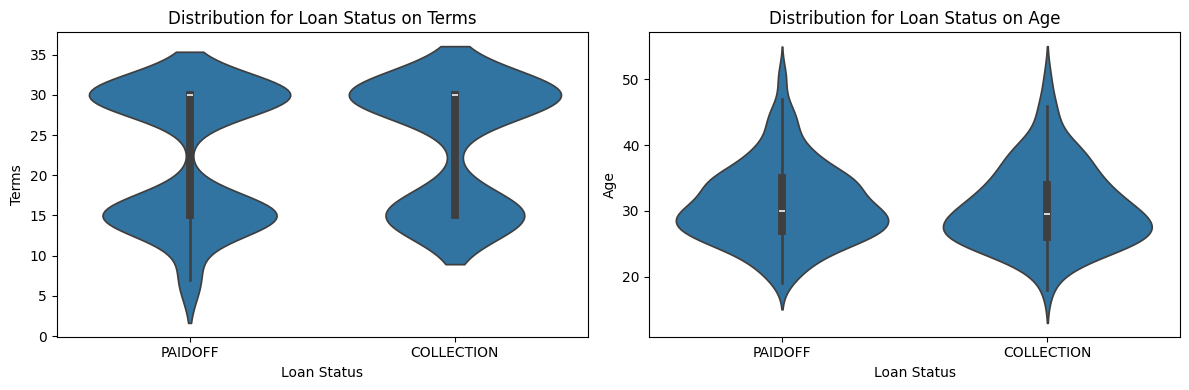

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.violinplot(x="loan_status", y ="terms",data =type_change_df)
plt.title("Distribution for Loan Status on Terms")
plt.xlabel("Loan Status")
plt.ylabel("Terms")

plt.subplot(1, 2, 2)
sns.violinplot(x="loan_status", y ="age",data =type_change_df)
plt.title("Distribution for Loan Status on Age")
plt.xlabel("Loan Status")
plt.ylabel("Age")
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has be

<Figure size 1500x1500 with 0 Axes>

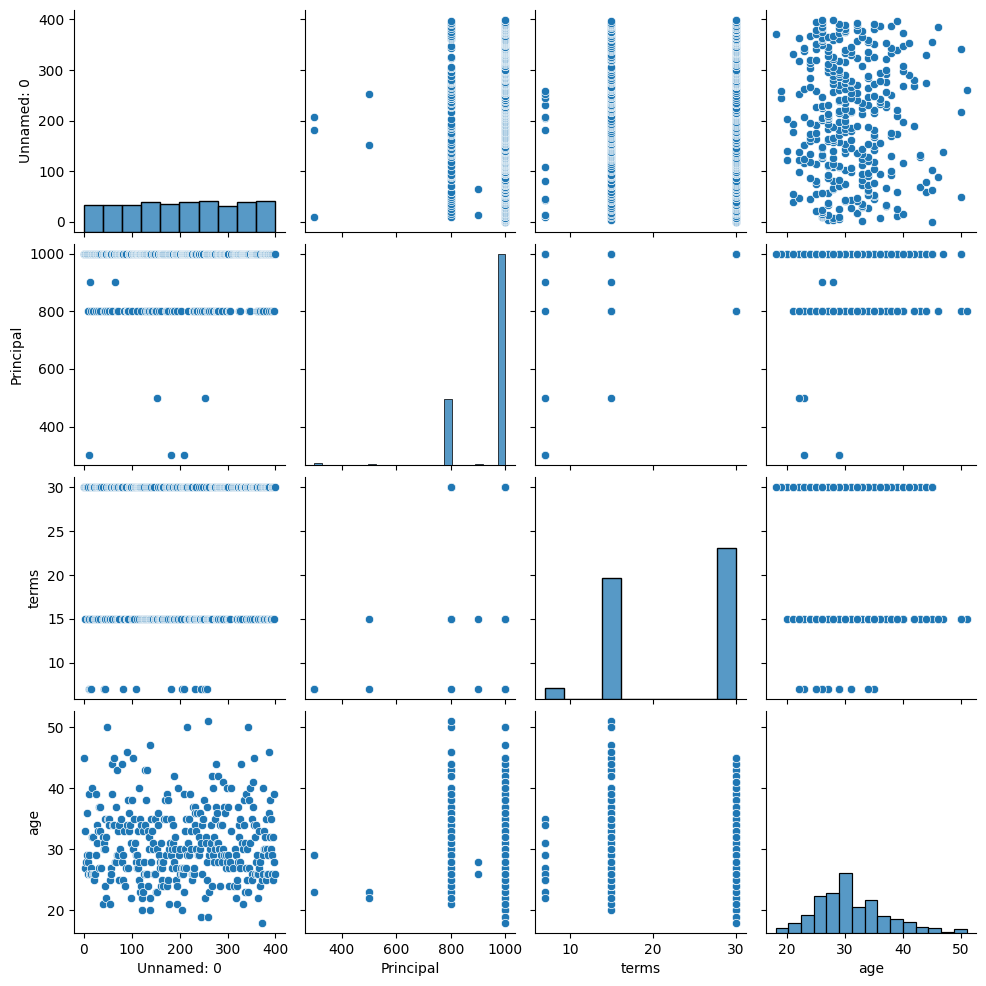

In [ ]:
plt.figure(figsize=(15, 15))
sns.pairplot(type_change_df,palette='set1')
plt.show()

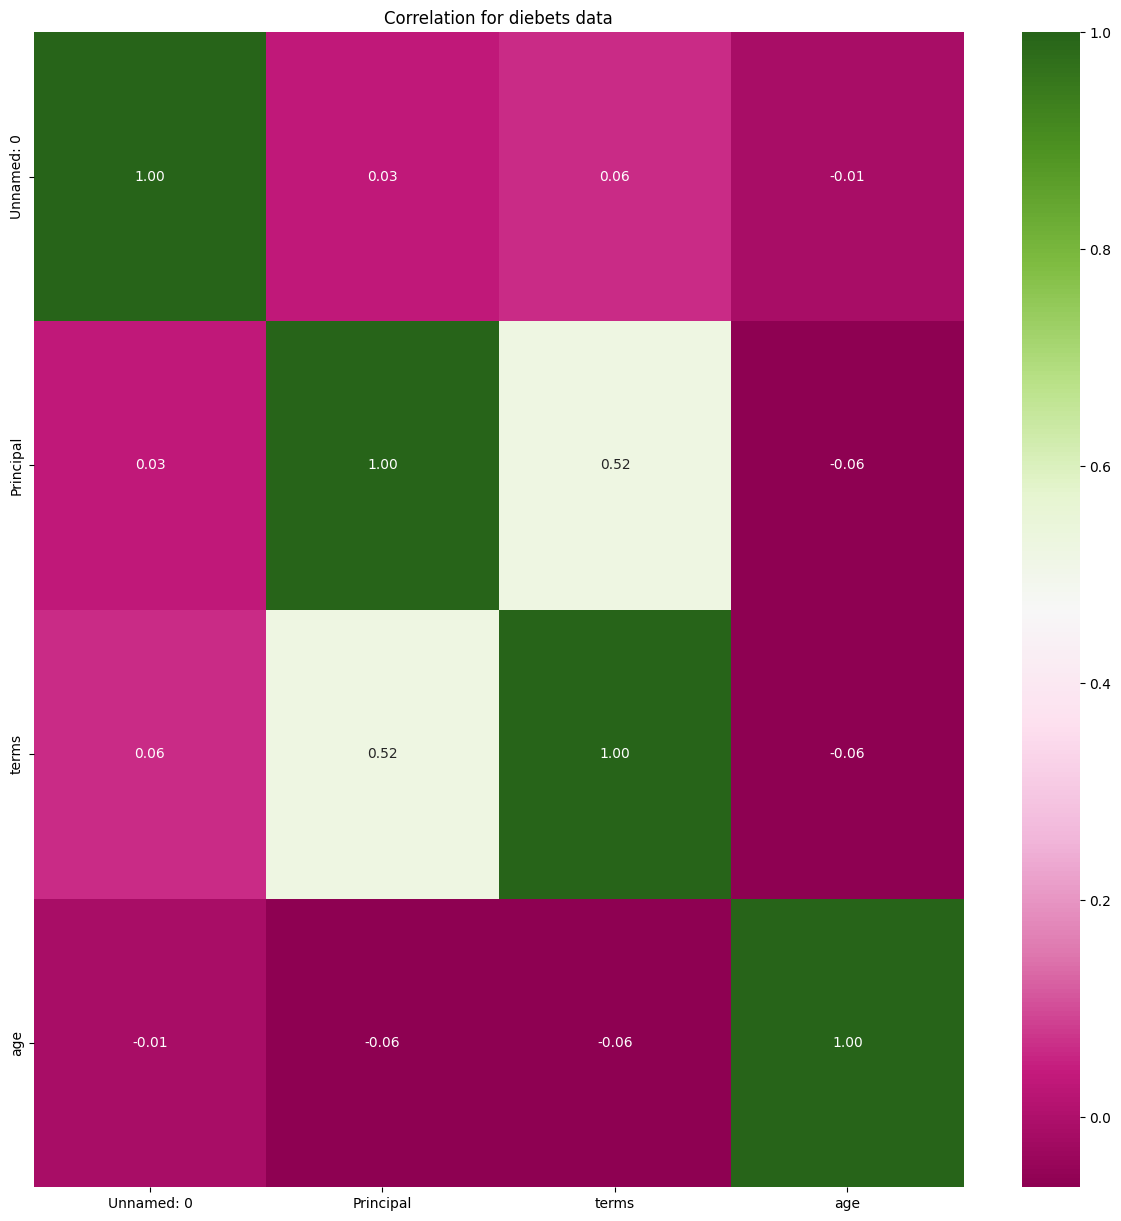

In [ ]:
numeric_df = type_change_df.select_dtypes(include = ['number'])
corr_matrix =numeric_df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix,annot=True, cmap="PiYG",fmt=".2f")
plt.title('Correlation for diebets data')
plt.show()

In [ ]:
type_change_df['education']

,education
0,High School or Below
1,Bechalor
2,college
3,college
4,college
...,...
341,High School or Below
342,High School or Below
343,college
344,college


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding for loan_status (Paid/Defaulted)
label_encoder = LabelEncoder()
type_change_df['loan_status'] = label_encoder.fit_transform(type_change_df['loan_status'])


In [ ]:
# One-Hot Encoding for education and Gender
type_change_df = pd.get_dummies(type_change_df, columns=['education'],dtype=int)


##### Removing the "Master or Above" category is considered due to its insufficient representation, potential overfitting, model instability, and minimal impact on overall results.

In [ ]:
# type_change_df.drop('education_Master or Above',axis=1,inplace=True)
# type_change_df

In [ ]:
# One-Hot Encoding for education and Gender
type_change_df = pd.get_dummies(type_change_df, columns=['Gender'],dtype=int,drop_first=True)

# Master is drop

### We found that Master or Above contain only two data points, and

In [ ]:
type_change_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Unnamed: 0                      346 non-null    int64         
 1   loan_status                     346 non-null    int64         
 2   Principal                       346 non-null    int64         
 3   terms                           346 non-null    int64         
 4   effective_date                  346 non-null    datetime64[ns]
 5   due_date                        346 non-null    datetime64[ns]
 6   age                             346 non-null    int64         
 7   education_Bechalor              346 non-null    int64         
 8   education_High School or Below  346 non-null    int64         
 9   education_Master or Above       346 non-null    int64         
 10  education_college               346 non-null    int64         
 11  Gender

In [ ]:
print(type_change_df.head())
print(df.head())

   Unnamed: 0  loan_status  Principal  terms effective_date   due_date  age  \
0           0            1       1000     30     2016-09-08 2016-10-07   45   
1           2            1       1000     30     2016-09-08 2016-10-07   33   
2           3            1       1000     15     2016-09-08 2016-09-22   27   
3           4            1       1000     30     2016-09-09 2016-10-08   28   
4           6            1       1000     30     2016-09-09 2016-10-08   29   

   education_Bechalor  education_High School or Below  \
0                   0                               1   
1                   1                               0   
2                   0                               0   
3                   0                               0   
4                   0                               0   

   education_Master or Above  education_college  Gender_male  
0                          0                  0            1  
1                          0                  0         

### Unnamed: 0: This column appears to be an index column that was carried over from the CSV file. It doesn't provide any useful information for modeling.

### effective_date and due_date: Because we findout that (due_date) - (effective_dat) = (terms-1) and therefore we no need that two dates columns, we can used **terms** instead.


In [ ]:
print((type_change_df['due_date'] - type_change_df['effective_date']).dt.days)
print(type_change_df['terms'])

0      29
1      29
2      14
3      29
4      29
       ..
341    14
342    29
343    14
344    59
345    29
Length: 346, dtype: int64
0      30
1      30
2      15
3      30
4      30
       ..
341    15
342    30
343    15
344    30
345    30
Name: terms, Length: 346, dtype: int64


In [ ]:
# Drop unnecessary columns
type_change_df = type_change_df.drop(['Unnamed: 0', 'effective_date', 'due_date'], axis=1)


In [ ]:
# type_change_df.shape
type_change_df.head()
majority_class = type_change_df[type_change_df['loan_status'] == 1]
minority_class = type_change_df[type_change_df['loan_status'] == 0]
minority_oversampled = minority_class.sample(n=len(majority_class), replace=True)
balanced_df = pd.concat([majority_class, minority_oversampled])
balanced_df = balanced_df.sample(frac=1).reset_index(drop=True)
balanced_df['loan_status'].value_counts()
type_change_df = balanced_df

## Decision Tree

In [ ]:
x = type_change_df.drop(columns = 'loan_status', axis = 1)
y = type_change_df['loan_status']
# x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
# x_train_scaled = scaler.fit_transform(x_train)
# x_test_scaled = scaler.transform(x_test)

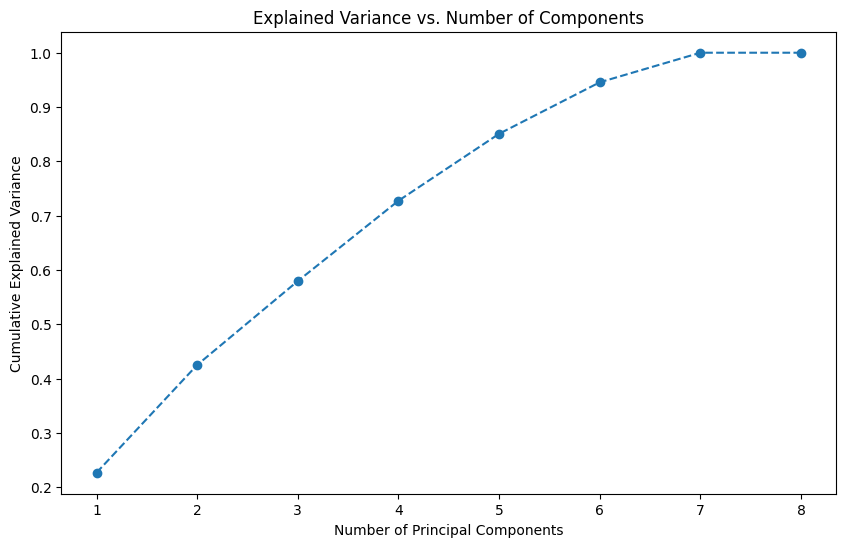

In [ ]:
pca = PCA()
pca.fit(X_scaled)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.show()

#### By studing above graph , 7 is the best number of components.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=7)
X_pca = pca.fit_transform(X_scaled)

# Check the explained variance ratio
print(f"Explained Variance Ratio of Each Component: {pca.explained_variance_ratio_}")
print(f"Total Explained Variance: {sum(pca.explained_variance_ratio_)}")

# Split the transformed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

Explained Variance Ratio of Each Component: [0.22685557 0.19836527 0.15443668 0.14785365 0.12326494 0.09479168
 0.05443221]
Total Explained Variance: 1.0


In [ ]:
# Using Gini Impurity
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)
model_gini.fit(X_train, y_train)
pred_gini = model_gini.predict(X_test)
print(f"Gini Accuracy: {accuracy_score(y_test, pred_gini):.2f}")

# Using Entropy (Information Gain)
model_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3)
model_entropy.fit(X_train, y_train)
pred_entropy = model_entropy.predict(X_test)
print(f"Entropy Accuracy: {accuracy_score(y_test, pred_entropy):.2f}")


Gini Accuracy: 0.56
Entropy Accuracy: 0.54


#### Why "Entropy" is a Good Choice
Higher Accuracy: "entropy"achieved the highest accuracy (0.70) compared to "gini" (0.67). Even though the difference may seem small, it indicates that the splits made by "entropy" are slightly better in maximizing the predictive power of your model.


In [ ]:

k=10
mean_dec = np.zeros((k-1))

for n in range(1,k):
    #Train Model and Predict
    dectree = DecisionTreeClassifier(criterion="entropy", max_depth = n)
    dectree.fit(X_train, y_train)
    yhat_dec = dectree.predict(X_test)
    mean_dec[n-1] = np.mean(yhat_dec==y_test)

mean_dec

array([0.52884615, 0.53846154, 0.53846154, 0.54807692, 0.54807692,
       0.56730769, 0.63461538, 0.63461538, 0.67307692])

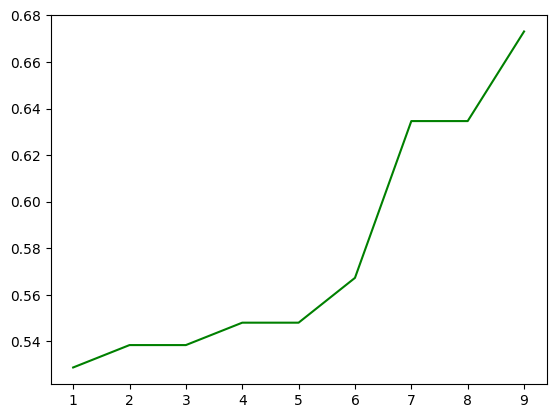

In [ ]:
plt.plot(range(1,k),mean_dec,'g')

In [ ]:
dec_acc = accuracy_score(y_test, yhat_dec)
print( "The best accuracy was at", mean_dec.max(), "and max_depth of 3+1 =4")
print()
print(classification_report(y_test, yhat_dec))

The best accuracy was at 0.6730769230769231 and max_depth of 3+1 =4

              precision    recall  f1-score   support

           0       0.64      0.83      0.72        53
           1       0.74      0.51      0.60        51

    accuracy                           0.67       104
   macro avg       0.69      0.67      0.66       104
weighted avg       0.69      0.67      0.66       104



In [ ]:
print(confusion_matrix(y_test,yhat_dec))

[[44  9]
 [25 26]]


## GaussianNB

In [ ]:
# X_train, X_test, y_train, y_test

k = 15

# Initialize arrays to store accuracy values
mean_acc_gnb = np.zeros(k-1)
std_acc_gnb = np.zeros(k-1)

# Loop to simulate the repeated evaluation process similar to KNN
for n in range(1, k):
    # Train GaussianNB model
    gnb = GaussianNB().fit(X_train, y_train)
    yhat_gnb = gnb.predict(X_test)

    # Store mean accuracy
    mean_acc_gnb[n-1] = accuracy_score(y_test, yhat_gnb)

    # Calculate standard deviation (optional if needed for comparison)
    std_acc_gnb[n-1] = np.std(yhat_gnb == y_test) / np.sqrt(yhat_gnb.shape[0])

mean_acc_gnb

array([0.59615385, 0.59615385, 0.59615385, 0.59615385, 0.59615385,
       0.59615385, 0.59615385, 0.59615385, 0.59615385, 0.59615385,
       0.59615385, 0.59615385, 0.59615385, 0.59615385])

## K Nearest Neighbor(KNN)

In [ ]:
k=15
mean_acc = np.zeros((k-1))
std_acc=np.zeros((k-1))

for n in range(1,k):
    #Train Model and Predict
    neig = KNeighborsClassifier(n_neighbors =n).fit(X_train, y_train)
    yhat = neig.predict(X_test)
    mean_acc[n-1]=np.mean(yhat==y_test);

    #std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.68269231, 0.71153846, 0.67307692, 0.61538462, 0.56730769,
       0.55769231, 0.59615385, 0.56730769, 0.625     , 0.65384615,
       0.63461538, 0.61538462, 0.60576923, 0.63461538])

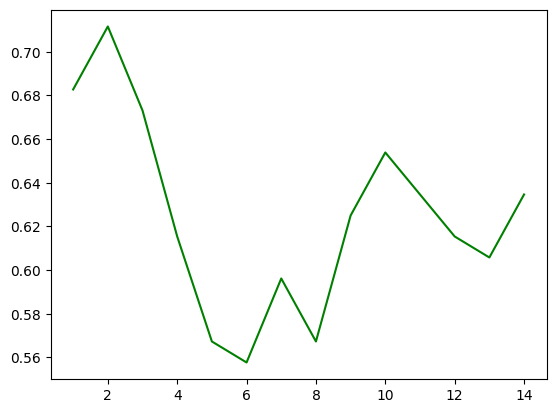

In [ ]:
plt.plot(range(1,k),mean_acc,'g')

In [ ]:
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       0.64      0.66      0.65        53
           1       0.63      0.61      0.62        51

    accuracy                           0.63       104
   macro avg       0.63      0.63      0.63       104
weighted avg       0.63      0.63      0.63       104



In [ ]:
print(confusion_matrix(y_test,yhat))
yhat_train = neig.predict(X_train)

train_accuracy_knn = accuracy_score(y_train,yhat_train)
test_accuracy_knn = accuracy_score(y_test,yhat)
conf_matrix_knn = confusion_matrix(y_test,yhat)
class_report_knn = classification_report(y_test, yhat)
print('Train_accuracy :',train_accuracy_knn)
print('Test_accuracy :\n',test_accuracy_knn)
print('Confusion_matrix :\n',conf_matrix_knn)
#TT TF FT FF
print('Classification_report :\n',class_report_knn)

[[35 18]
 [20 31]]
Train_accuracy : 0.6682692307692307
Test_accuracy :
 0.6346153846153846
Confusion_matrix :
 [[35 18]
 [20 31]]
Classification_report :
               precision    recall  f1-score   support

           0       0.64      0.66      0.65        53
           1       0.63      0.61      0.62        51

    accuracy                           0.63       104
   macro avg       0.63      0.63      0.63       104
weighted avg       0.63      0.63      0.63       104



## SVC

In [ ]:
svm = SVC()
svm.fit(X_train,y_train)
y_train_pred_svc = svm.predict(X_train)
y_test_pred_svc = svm.predict(X_test)
train_accuracy = accuracy_score(y_train,y_train_pred_svc)
test_accuracy = accuracy_score(y_test,y_test_pred_svc)
conf_matrix = confusion_matrix(y_test,y_test_pred_svc)
class_report = classification_report(y_test, y_test_pred_svc)
print('Train_accuracy :',train_accuracy)
print('Test_accuracy :\n',test_accuracy)
print('Confusion_matrix :\n',conf_matrix)
#TT TF FT FF
print('Classification_report :\n',class_report)

Train_accuracy : 0.6346153846153846
Test_accuracy :
 0.6057692307692307
Confusion_matrix :
 [[39 14]
 [27 24]]
Classification_report :
               precision    recall  f1-score   support

           0       0.59      0.74      0.66        53
           1       0.63      0.47      0.54        51

    accuracy                           0.61       104
   macro avg       0.61      0.60      0.60       104
weighted avg       0.61      0.61      0.60       104



In [ ]:
# Define models to evaluate
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "k-Nearest Neighbors": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Dictionary to store model accuracies
model_accuracies = {}

# Evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[model_name] = accuracy
    print(f"{model_name} Accuracy: {accuracy:.4f}")

# Find the best model
best_model = max(model_accuracies, key=model_accuracies.get)
print(f"\nBest Model: {best_model} with Accuracy: {model_accuracies[best_model]:.4f}")

Logistic Regression Accuracy: 0.6346
Decision Tree Accuracy: 0.6827
Random Forest Accuracy: 0.7115
Support Vector Machine Accuracy: 0.6058
k-Nearest Neighbors Accuracy: 0.5673
Gradient Boosting Accuracy: 0.6923
XGBoost Accuracy: 0.7212

Best Model: XGBoost with Accuracy: 0.7212


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:28:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred_train = lr.predict(X_train)

In [ ]:
train_accuracy_lr = accuracy_score(y_train,y_pred_train)
test_accuracy_lr = accuracy_score(y_test,y_pred)
conf_matrix_lr = confusion_matrix(y_test,y_pred)
class_report_lr = classification_report(y_test, y_pred)

In [ ]:
print('Train_accuracy :',train_accuracy_lr)
print('Test_accuracy :\n',test_accuracy_lr)
print('Confusion_matrix :\n',conf_matrix_lr)
#TT TF FT FF
print('Classification_report :\n',class_report_lr)

Train_accuracy : 0.5769230769230769
Test_accuracy :
 0.6346153846153846
Confusion_matrix :
 [[35 18]
 [20 31]]
Classification_report :
               precision    recall  f1-score   support

           0       0.64      0.66      0.65        53
           1       0.63      0.61      0.62        51

    accuracy                           0.63       104
   macro avg       0.63      0.63      0.63       104
weighted avg       0.63      0.63      0.63       104



#### f1-scoare precision accuracy confusion matrix